<a href="https://colab.research.google.com/github/Nadika18/Facial_emotion_recognition/blob/eda/Facial_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

# Mount Google Drive to access data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Function to load and organize images
def load_images(directory):
    images = []
    labels = []

    # Get emotion classes from the folder names
    emotion_classes = sorted(os.listdir(directory))

    for i, emotion_class in enumerate(emotion_classes):
        class_dir = os.path.join(directory, emotion_class)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(emotion_class)  # Use the folder name as the emotion label

    images = np.array(images)
    labels = np.array(labels)

    return images, labels


In [8]:
# Assuming the folder structure is like this: /path/to/dataset/train/Emotion1, /path/to/dataset/train/Emotion2, etc.
train_dir = '/content/drive/MyDrive/affectnet/train'
test_dir = '/content/drive/MyDrive/affectnet/val_class'

# Load and organize train images
train_images, train_labels = load_images(train_dir)

<ipython-input-7-fa7e603642b3>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [9]:
test_images, test_labels = load_images(test_dir)

<ipython-input-7-fa7e603642b3>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


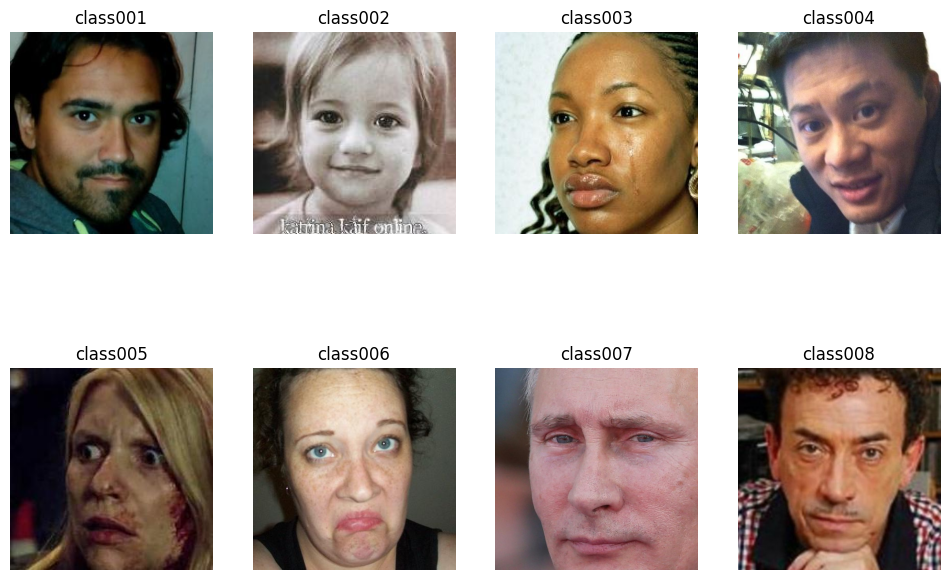

In [10]:
# EDA - Plot sample images from each emotion class in the training set
emotion_classes = sorted(np.unique(train_labels))

plt.figure(figsize=(12, 8))
for i, emotion_class in enumerate(emotion_classes):
    class_indices = np.where(train_labels == emotion_class)[0]
    sample_index = class_indices[0]
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_images[sample_index])
    plt.title(emotion_class)
    plt.axis('off')
plt.show()

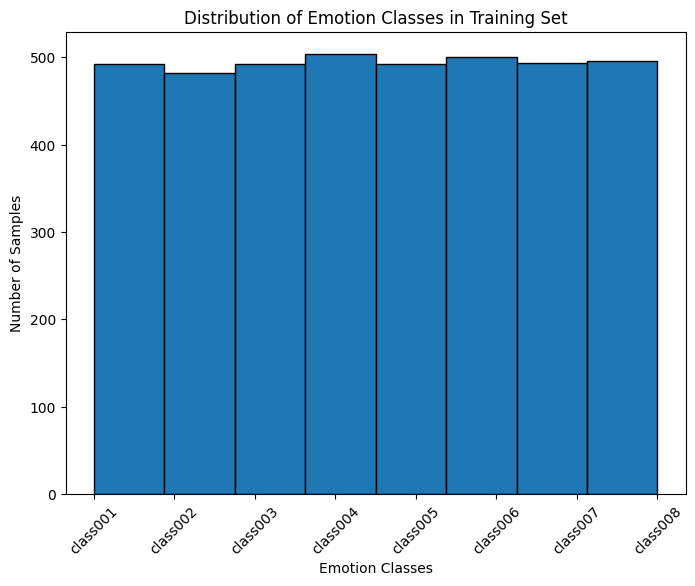

In [11]:
# EDA - Plot the distribution of emotion classes in the training set
plt.figure(figsize=(8, 6))
plt.hist(train_labels, bins=np.unique(train_labels).shape[0], edgecolor='black', align='mid')
plt.xticks(rotation=45)
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Samples')
plt.title('Distribution of Emotion Classes in Training Set')
plt.show()

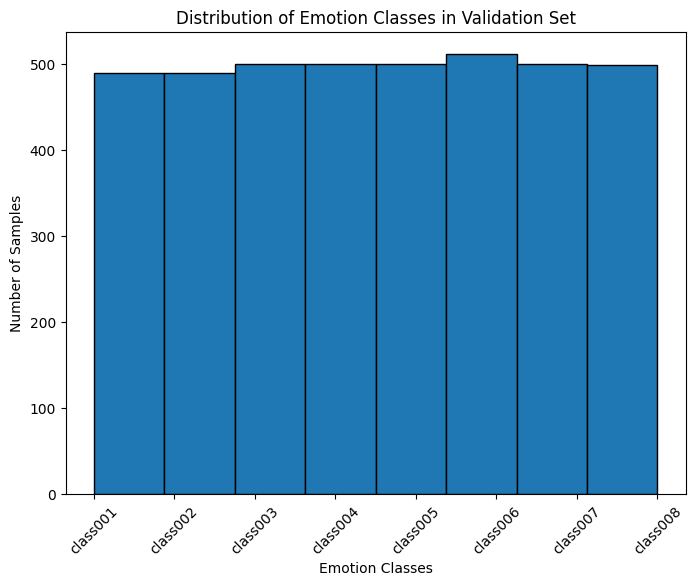

In [14]:
# EDA - Plot the distribution of emotion classes in the validation set
plt.figure(figsize=(8, 6))
plt.hist(test_labels, bins=np.unique(test_labels).shape[0], edgecolor='black', align='mid')
plt.xticks(rotation=45)
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Samples')
plt.title('Distribution of Emotion Classes in Validation Set')
plt.show()